<a href="https://colab.research.google.com/github/ucfilho/Math_Methods/blob/master/ODE_aquece_reatores_abril_16_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
%matplotlib notebook
import matplotlib.pyplot as plt

In [0]:
# funtion that return dy/dt
def fun(y,t):
  dydt=np.zeros(2)
  ro=40
  cp=0.6
  F0=90
  Q1=10000
  V1=450
  V2=450
  T0=64
  T1=y[0]
  T2=y[1]
  dydt[0]=F0/V1*(T0-T1)+Q1/(ro*cp*V1)
  dydt[1]=F0/V1*(T1-T2)
  return dydt

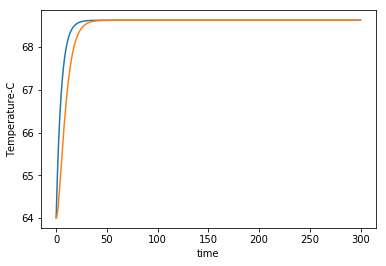

In [3]:
y0=[64,64]
t=np.linspace(0,300,num=1000)
y=odeint(fun,y0,t)
%matplotlib inline
plt.plot(t,y)
plt.xlabel("time")
plt.ylabel("Temperature-C")
plt.show()

In [0]:
def temp(y,t):
  
  ro=40
  cp=0.6
  F0=90
  Q1=10000
  V1=450
  V2=450
  T0=64
  T1=y[0]
  T2=y[1]
  temp=T2*np.exp(-F0*t/V1)  +F0/V1*(T1*t*np.exp(-F0*t/V1)+(T0+Q1/(ro*cp*F0))*(V1/F0-V1/F0*np.exp(-F0*t/V1)-t*np.exp(-F0*t/V1)))
  return temp
  

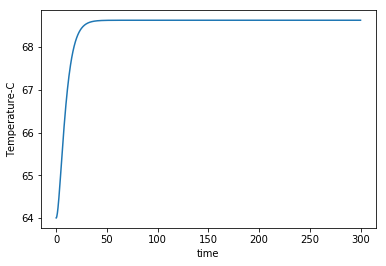

In [5]:
y0=[64,64]
t=np.linspace(0,300,num=1000)
y=pd.Series(t).apply(lambda t: temp(y0,t))
%matplotlib inline
plt.plot(t,y)
plt.xlabel("time")
plt.ylabel("Temperature-C")
plt.show()